In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
life_exp = pd.read_csv("Life Expectancy Data.csv")

In [18]:
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
life_exp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
life_exp.columns = list(x.strip() for x in life_exp.columns) 
# Stripping the extra space as having issue addressing the columns

In [21]:
life_exp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### Visualising Coorelation Matrix using Heatmap

<AxesSubplot:>

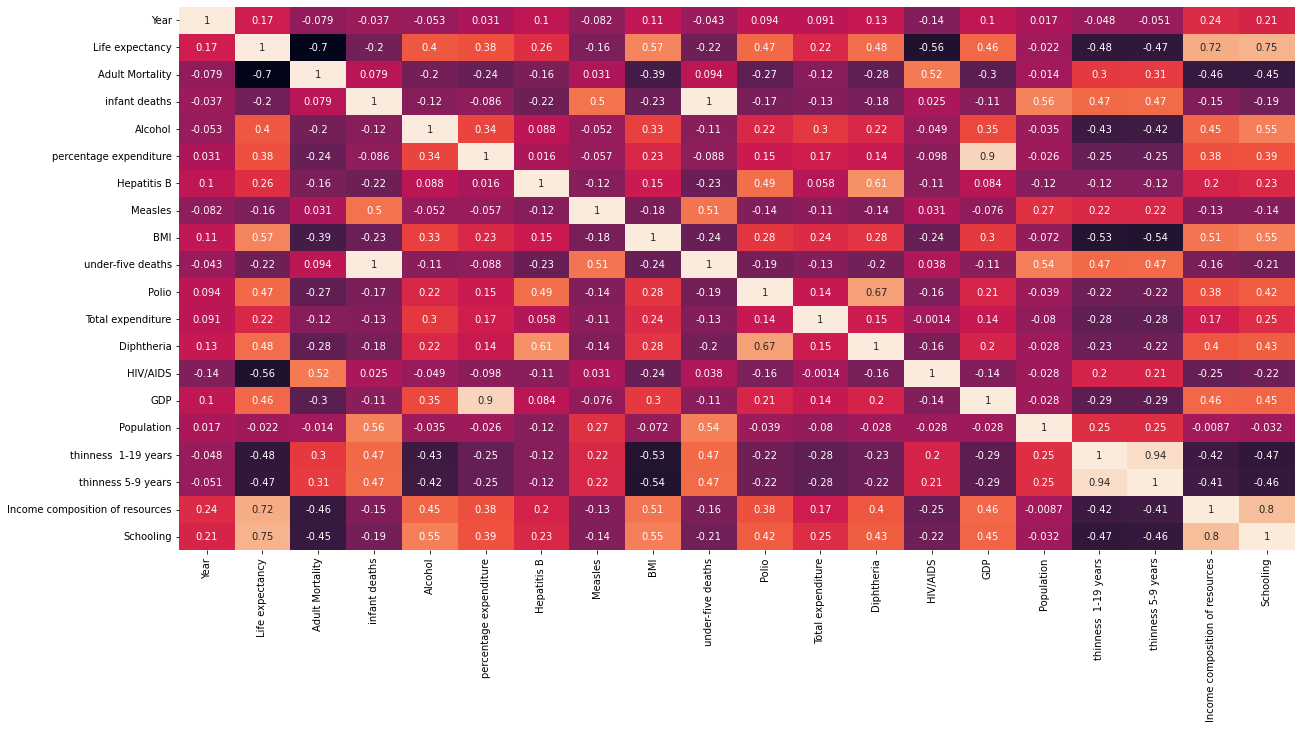

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(life_exp.corr(),annot=True,cbar=False)

### Visualising Null Value Attributes

<AxesSubplot:>

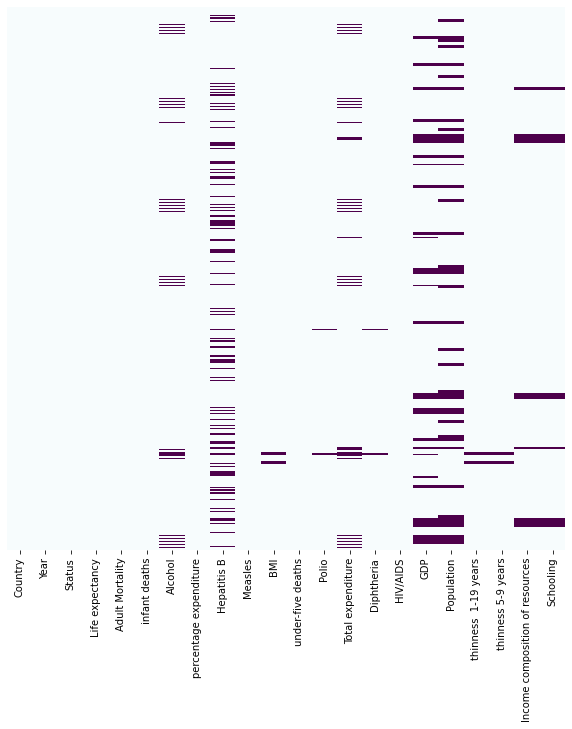

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(life_exp.isna(),yticklabels=False,cbar=False,cmap='BuPu')

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Checking for corelation with life expectancy :


In [24]:
life_exp.corr()['Life expectancy']

Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                           -0.157586
BMI                                0.567694
under-five deaths                 -0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
HIV/AIDS                          -0.556556
GDP                                0.461455
Population                        -0.021538
thinness  1-19 years              -0.477183
thinness 5-9 years                -0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy, dtype: float64

In [25]:
life_exp.corr()['Life expectancy'].sort_values() 

Adult Mortality                   -0.696359
HIV/AIDS                          -0.556556
thinness  1-19 years              -0.477183
thinness 5-9 years                -0.471584
under-five deaths                 -0.222529
infant deaths                     -0.196557
Measles                           -0.157586
Population                        -0.021538
Year                               0.170033
Total expenditure                  0.218086
Hepatitis B                        0.256762
percentage expenditure             0.381864
Alcohol                            0.404877
GDP                                0.461455
Polio                              0.465556
Diphtheria                         0.479495
BMI                                0.567694
Income composition of resources    0.724776
Schooling                          0.751975
Life expectancy                    1.000000
Name: Life expectancy, dtype: float64

### INFERENCE :
##### Life Expectancy has highest corelation with the feature Schooling
### Checking if there are any null values :

C:\Users\nsimh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Schooling', ylabel='count'>

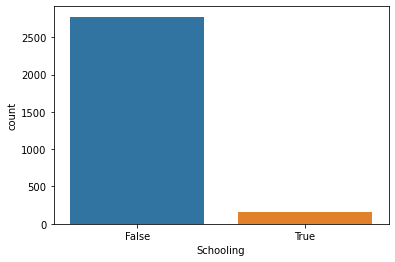

In [26]:
sns.countplot(life_exp['Schooling'].isna()) #Only few data has NULL

In [27]:
(life_exp['Schooling'].isna()).sum()

163

In [28]:
len(life_exp)

2938

In [29]:
life_exp['Schooling'].describe()

count    2775.000000
mean       11.992793
std         3.358920
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64

##### Many values of Schooling have na, so we can either drop them or we can replace by relavent data(like median) as the number of rows with na is very small compared to the size of the dataset
##### Observation 1: Replaced by median (without scaling)
####    Result : Cost Function = 7.8
##### Observation 2 : Drop the rows(without scaling)
#####    Result : Cost Function = 6.16

In [30]:
#life_exp['Schooling'].fillna(11.99,inplace=True)
#OR
droprows = life_exp[life_exp['Schooling'].isna()].index
life_exp.drop(axis=0,index=droprows,inplace=True)
life_exp['Schooling'].isna().sum()

0

In [31]:
life_exp['Schooling'].isna().sum()

0

In [32]:
life_exp['Life expectancy'].isna().index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937],
           dtype='int64', length=2775)

In [33]:
life_exp['Life expectancy'].dropna(axis=0,inplace=True)

In [34]:
life_exp['Life expectancy'].isna().sum()

7

In [35]:
droprows = life_exp[life_exp['Life expectancy'].isna()].index
life_exp.drop(axis=0,index=droprows,inplace=True)
life_exp['Life expectancy'].isna().sum()

0

In [37]:
new_df = life_exp[['Life expectancy','Schooling']]

### Scaling Data : By Min Max Scaling

In [38]:
df_min_max_scaled = new_df.copy()

for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	

print(df_min_max_scaled)

      Life expectancy  Schooling
0            0.544592   0.487923
1            0.447818   0.483092
2            0.447818   0.478261
3            0.440228   0.473430
4            0.434535   0.458937
...               ...        ...
2933         0.151803   0.444444
2934         0.155598   0.458937
2935         0.161290   0.483092
2936         0.170778   0.473430
2937         0.184061   0.473430

[2768 rows x 2 columns]


In [39]:
X = np.array(df_min_max_scaled['Schooling'])
Y = np.array(df_min_max_scaled['Life expectancy'])
X,Y

(array([0.48792271, 0.48309179, 0.47826087, ..., 0.48309179, 0.47342995,
        0.47342995]),
 array([0.54459203, 0.44781784, 0.44781784, ..., 0.16129032, 0.17077799,
        0.18406072]))

In [66]:
X.shape,Y.shape

((2768,), (2768,))

## Linear Regression for Univarient : Closed Form Solution

In [43]:
#Mean square cost function
def CostFunction(Y_Pred,Y):
    sum=0
    leng = len(Y_Pred)
    for i in range(leng):
        sum+=(Y_Pred[i]-Y[i])**2
    return (sum/len(Y))


#To plot graph between Truth vs Predicted wrt Schooling attribute
def plot_predication(X,Y,Y_Pred,xlabel="X"):
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(10,5))
    axes = fig.add_axes([0,0,1,1])
    plt.scatter(X,Y,label="Truth")
    axes.plot(X,Y_Pred,label='Predicted',color='r',lw='4',ls='--')
    axes.set_xlabel(xlabel)
    axes.set_ylabel("Life Expectancy ")
    axes.set_title("Linear Regression")
    axes.legend()


def LinearRegression_ClosedForm(X,Y):
    XiYi=list()
    for i in range(len(X)):
        XiYi.append(X[i]*Y[i])
    XiYi = np.array(XiYi)
    leng = len(X)
    X_square = X**2
    Mat1 = np.array([[leng,X.sum()],
                     [X.sum(),X_square.sum()]]
                   )
    Mat2 = np.array([[Y.sum()],[XiYi.sum()]])

    Y_Pred=list()
    result_coff = np.matmul(np.linalg.inv(Mat1),Mat2)
    

    for i in range(leng):
        y_pred = result_coff[1]*X[i] + result_coff[0]
        Y_Pred.append(y_pred)
    return Y_Pred

In [44]:
Y_Pred = LinearRegression_ClosedForm(X,Y)

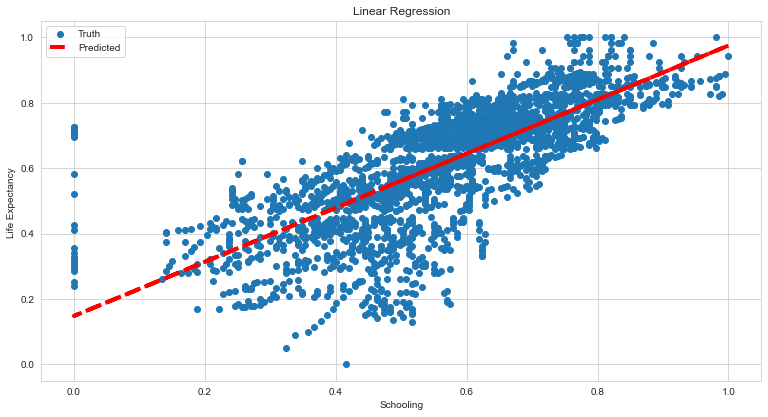

In [45]:
plot_predication(X,Y,Y_Pred,"Schooling")

In [46]:
print("Loss using -  Mean Square Error : ",(CostFunction(Y,Y_Pred)[0]))


Loss using -  Mean Square Error :  0.013704683262267855


#### INFERENCE:
The Error is 0.013 which implies the model fit is very much accurate

# Linear Regression for Univarient : Gradient Descend 

In [47]:
split_size = 0.7   #Split Size for Train Test split
split = int(len(X)*split_size)
X_Train=X[:split]
Y_Train=Y[:split]
X_Test=X[split:]
Y_Test=Y[split:]
print(len(X_Train),len(Y_Train),len(X_Test),len(Y_Test))

1937 1937 831 831


In [61]:
#to calculate Mean sqaure Error
def CostFunction(Y_Pred,Y):
    sum=0
    leng = len(Y_Pred)
    for i in range(leng):
        sum+=(Y_Pred[i]-Y[i])**2
    return (sum/len(Y))

#To plot graph between Truth vs Predicted wrt Schooling attribute
def plot_YPred_vs_YTest(Y_Pred,Y_Test):
    fig = plt.figure(figsize=(10,6))
    axes = fig.add_axes([0,0,1,1])
    plt.scatter(X_Test,Y_Test,lw=1,label='Truth - Y Test')
    plt.plot(X_Test,Y_Pred,color='r',ls='--',lw=4,label='Predicted - Y Predicted')
    axes.set_xlabel(" Schooling ")
    axes.set_ylabel(" Life expectancy ")
    axes.set_title("Linear Regression")
    axes.legend()
        
#class implementing Linear Regression
class LR:  
    coeff_1 = 0 # Y intercept
    coeff_2 = 0 # Slope
    
    def find_Y_Pred(self,X,new_coeff_1,new_coeff_2):
        leng = len(X)
        Y_Pred = list()
        for i in range(leng):
            y_pred = new_coeff_1 + new_coeff_2*X[i]
            Y_Pred.append(y_pred)
        return Y_Pred
    
    def partial_derivative_Coeff_1(self,X,Y):
        leng = len(X)
        sum=0
        for i in range(leng):
            sum+=(Y[i]-(self.coeff_1 + X[i]*self.coeff_2))*(-1)
        sum = 2*sum
        return sum

    def partial_derivative_Coeff_2(self,X,Y):
        leng = len(X)
        sum=0
        for i in range(leng):
            sum+=(Y[i]-(self.coeff_1 + X[i]*self.coeff_2))*(-X[i])
        sum=2*sum
        return sum
    
    def LinearRegression_GradientDesc(self,X,Y,step_size=0.0001,epochs=1000):
        cost_list = list()
        for i in range(epochs):
            coeff_1_par_der =  self.partial_derivative_Coeff_1(X,Y)
            coeff_2_par_der =  self.partial_derivative_Coeff_2(X,Y)

            coeff_1_new = self.coeff_1 - step_size*coeff_1_par_der
            coeff_2_new = self.coeff_2 - step_size*coeff_2_par_der

            Y_Pred = self.find_Y_Pred(X,coeff_1_new,coeff_2_new)
            cost_list.append(CostFunction(Y_Pred,Y))
            self.coeff_1 = coeff_1_new
            self.coeff_2 = coeff_2_new
        
        self.plot_Cost_vs_Epoch(epochs,cost_list)
       
    def Predict_LinearRegression_GradientDesc(self,X):
        Y_Pred = self.find_Y_Pred(X,self.coeff_1,self.coeff_2)
        return Y_Pred
    
    def plot_Cost_vs_Epoch(self,epochs,cost_List):
        fig = plt.figure(figsize=(10,6))
        axes = fig.add_axes([0,0,1,1])
        axes.plot(range(epochs),cost_List,lw=3)
        axes.set_xlabel(" Epochs ")
        axes.set_ylabel(" Cost ")
        axes.set_title("Cost vs Epoch during Training")
    

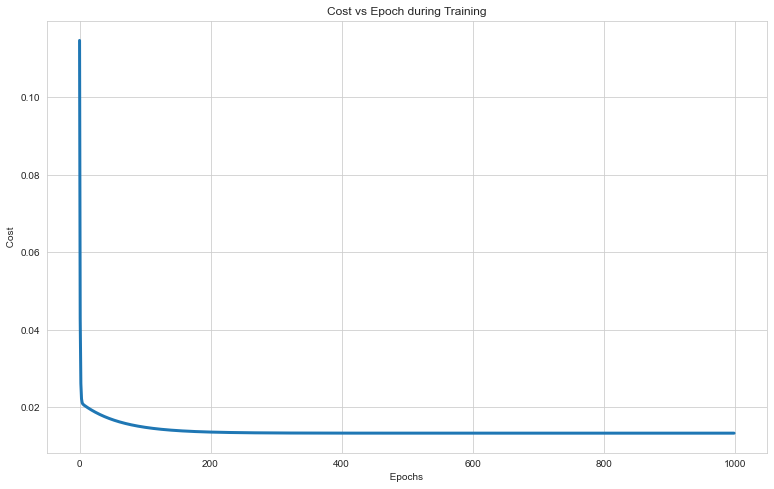

In [62]:
lr =  LR()
lr.LinearRegression_GradientDesc(X_Train,Y_Train)

In [63]:
Y_Pred = lr.Predict_LinearRegression_GradientDesc(X_Test)

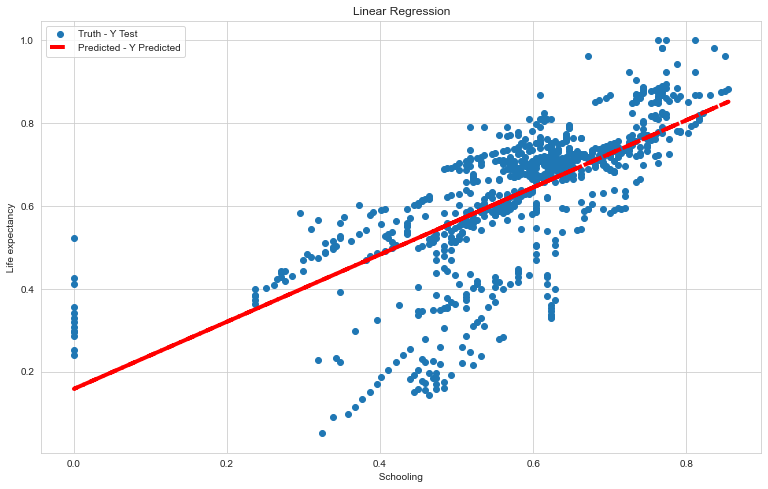

In [64]:
plot_YPred_vs_YTest(Y_Pred,Y_Test)

In [65]:
print("Cost :  Mean Square Error = ",CostFunction(Y_Pred,Y_Test))

Cost :  Mean Square Error =  0.014747441854052539


### INFERENCE :  
The Error is 0.014 which implies the model fit is very accurate